In [1]:
import re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import defaultdict

import torch.nn as nn
from torch.nn import Embedding
from torch.utils.data import Dataset, DataLoader

from mlp.dataset import IMDB_Dataset

In [2]:
import tqdm
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
from torch.optim import AdamW
from torch.utils.data import DataLoader

from mlp.dataset import IMDB_Dataset
from mlp.model import IMDB_Model

# Define train and test datasets
data = pd.read_csv("data/imdb_data.csv", nrows=10000)
trainning_db = IMDB_Dataset(data.iloc[:8000])
val_db = IMDB_Dataset(data.iloc[8000:], vocab=trainning_db.vocab, max_len=trainning_db.max_len)

train_loader = DataLoader(trainning_db, batch_size=8, shuffle=True)
val_loader = DataLoader(val_db, batch_size=8)

# Define the model
device = (torch.device("cuda") if torch.cuda.is_available() else "cpu")
model = IMDB_Model(vocab_size=len(trainning_db.vocab), embedding_dim=64)
model.to(device)
criterion = nn.BCEWithLogitsLoss()
optim = AdamW(model.parameters(), lr=0.0001)

# Training loop
epochs = 25

train_loss = []
val_loss = []
val_acc = []
for epoch in tqdm.tqdm(range(epochs)):
    # Train loop
    model.train()
    train_batch_loss = []
    for train_batch in train_loader:
        x, label = train_batch
        x = x.to(device)
        label = label.unsqueeze(1).float().to(device)
        optim.zero_grad()
        pred = model(x)
        loss = criterion(pred, label)
        loss.backward()
        optim.step()
        train_batch_loss.append(loss.item())
    
    # Validation step
    model.eval()
    val_batch_loss = []
    val_batch_acc = []
    with torch.no_grad():
        for val_batch in val_loader:
            x, label = val_batch
            x = x.to(device)
            label = label.unsqueeze(1).float().to(device)
            pred = model(x)
            loss = criterion(pred, label)
            val_batch_loss.append(loss.item())
            # Compute accuracy
            sigmoid = nn.Sigmoid()
            preds = (sigmoid(pred) > 0.5).float()
            correct = (preds == label).float().mean()
            val_batch_acc.append(correct.item())
            
    print(f"Epoch {epoch}/{epochs} - Train Loss: {np.mean(train_batch_loss):.4f} | Dev Loss: {np.mean(val_batch_loss):.4f} | Dev Acc: {np.mean(val_batch_acc):.4f}")
            
    train_loss.append(np.mean(train_batch_loss))
    val_loss.append(np.mean(val_batch_loss))
    val_acc.append(np.mean(val_batch_acc))

/Users/macbookpro/Desktop/Transformers/mlp/dataset.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.dataset['tokens'] = self.dataset['review'].apply(self.clean_str)
/Users/macbookpro/Desktop/Transformers/mlp/dataset.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.dataset['tokens'] = self.dataset['review'].apply(self.clean_str)
  4%|▍         | 1/25 [00:01<00:34,  1.44s/it]

Epoch 0/25 - Train Loss: 0.7635 | Dev Loss: 0.6880 | Dev Acc: 0.5720


  8%|▊         | 2/25 [00:02<00:30,  1.34s/it]

Epoch 1/25 - Train Loss: 0.7033 | Dev Loss: 0.6668 | Dev Acc: 0.6025


 12%|█▏        | 3/25 [00:03<00:28,  1.28s/it]

Epoch 2/25 - Train Loss: 0.6817 | Dev Loss: 0.6585 | Dev Acc: 0.6145


 16%|█▌        | 4/25 [00:05<00:27,  1.30s/it]

Epoch 3/25 - Train Loss: 0.6684 | Dev Loss: 0.6498 | Dev Acc: 0.6285


 20%|██        | 5/25 [00:06<00:25,  1.29s/it]

Epoch 4/25 - Train Loss: 0.6635 | Dev Loss: 0.6415 | Dev Acc: 0.6495


 24%|██▍       | 6/25 [00:07<00:24,  1.29s/it]

Epoch 5/25 - Train Loss: 0.6510 | Dev Loss: 0.6352 | Dev Acc: 0.6510


 28%|██▊       | 7/25 [00:09<00:23,  1.29s/it]

Epoch 6/25 - Train Loss: 0.6348 | Dev Loss: 0.6272 | Dev Acc: 0.6550


 32%|███▏      | 8/25 [00:10<00:21,  1.27s/it]

Epoch 7/25 - Train Loss: 0.6295 | Dev Loss: 0.6177 | Dev Acc: 0.6645


 36%|███▌      | 9/25 [00:11<00:20,  1.25s/it]

Epoch 8/25 - Train Loss: 0.6167 | Dev Loss: 0.6101 | Dev Acc: 0.6725


 40%|████      | 10/25 [00:12<00:19,  1.28s/it]

Epoch 9/25 - Train Loss: 0.6055 | Dev Loss: 0.5994 | Dev Acc: 0.6790


 44%|████▍     | 11/25 [00:14<00:18,  1.31s/it]

Epoch 10/25 - Train Loss: 0.6003 | Dev Loss: 0.5907 | Dev Acc: 0.6825


 48%|████▊     | 12/25 [00:15<00:16,  1.29s/it]

Epoch 11/25 - Train Loss: 0.5899 | Dev Loss: 0.5840 | Dev Acc: 0.6860


 52%|█████▏    | 13/25 [00:16<00:15,  1.30s/it]

Epoch 12/25 - Train Loss: 0.5754 | Dev Loss: 0.5743 | Dev Acc: 0.6920


 56%|█████▌    | 14/25 [00:18<00:14,  1.34s/it]

Epoch 13/25 - Train Loss: 0.5691 | Dev Loss: 0.5659 | Dev Acc: 0.7005


 60%|██████    | 15/25 [00:19<00:13,  1.35s/it]

Epoch 14/25 - Train Loss: 0.5668 | Dev Loss: 0.5610 | Dev Acc: 0.7065


 64%|██████▍   | 16/25 [00:21<00:12,  1.41s/it]

Epoch 15/25 - Train Loss: 0.5495 | Dev Loss: 0.5511 | Dev Acc: 0.7130


 68%|██████▊   | 17/25 [00:22<00:10,  1.36s/it]

Epoch 16/25 - Train Loss: 0.5390 | Dev Loss: 0.5454 | Dev Acc: 0.7165


 72%|███████▏  | 18/25 [00:23<00:09,  1.34s/it]

Epoch 17/25 - Train Loss: 0.5380 | Dev Loss: 0.5395 | Dev Acc: 0.7170


 76%|███████▌  | 19/25 [00:24<00:07,  1.31s/it]

Epoch 18/25 - Train Loss: 0.5264 | Dev Loss: 0.5331 | Dev Acc: 0.7245


 80%|████████  | 20/25 [00:26<00:06,  1.34s/it]

Epoch 19/25 - Train Loss: 0.5169 | Dev Loss: 0.5297 | Dev Acc: 0.7255


 84%|████████▍ | 21/25 [00:28<00:05,  1.44s/it]

Epoch 20/25 - Train Loss: 0.5067 | Dev Loss: 0.5249 | Dev Acc: 0.7255


 88%|████████▊ | 22/25 [00:29<00:04,  1.41s/it]

Epoch 21/25 - Train Loss: 0.5014 | Dev Loss: 0.5179 | Dev Acc: 0.7355


 92%|█████████▏| 23/25 [00:30<00:02,  1.40s/it]

Epoch 22/25 - Train Loss: 0.4933 | Dev Loss: 0.5139 | Dev Acc: 0.7345


 96%|█████████▌| 24/25 [00:32<00:01,  1.36s/it]

Epoch 23/25 - Train Loss: 0.4845 | Dev Loss: 0.5122 | Dev Acc: 0.7360


100%|██████████| 25/25 [00:33<00:00,  1.33s/it]

Epoch 24/25 - Train Loss: 0.4701 | Dev Loss: 0.5058 | Dev Acc: 0.7425


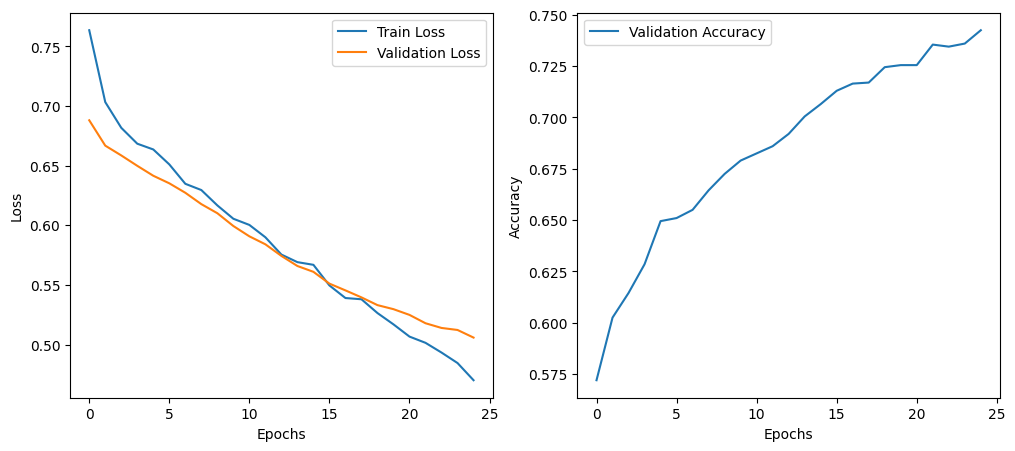

In [5]:
def plot_metrics(train_loss, val_loss, val_acc):
	# Plotting loss and accuracy curves
	plt.figure(figsize=(12, 5))
	plt.subplot(1, 2, 1)
	plt.plot(train_loss, label='Train Loss')
	plt.plot(val_loss, label='Validation Loss')
	plt.xlabel('Epochs')
	plt.ylabel('Loss')
	plt.legend()
	plt.subplot(1, 2, 2)
	plt.plot(val_acc, label='Validation Accuracy')
	plt.xlabel('Epochs')
	plt.ylabel('Accuracy')
	plt.legend()
	plt.show()
 
plot_metrics(train_loss, val_loss, val_acc)

In [6]:
def generate_review(model, review, vocab, max_len):
	model.eval()
	tokens = review.lower().split()
	indices = [vocab.get(token, vocab['<UNK>']) for token in tokens]
	if len(indices) < max_len:
		indices += [vocab['<PAD>']] * (max_len - len(indices))
	else:
		indices = indices[:max_len]
	input_tensor = torch.tensor(indices).unsqueeze(0).to(next(model.parameters()).device)
	with torch.no_grad():
		pred = model(input_tensor)
		sigmoid = nn.Sigmoid()
		prob = sigmoid(pred).item()
	return prob

good_review = "This movie was fantastic! I really loved it and would watch it again."
good_probability = generate_review(model, good_review, trainning_db.vocab, trainning_db.max_len)
print(f"Review: {good_review}\nPredicted Positive Sentiment Probability: {good_probability:.4f}")
print()
bad_review = "This movie was bad! I really hated it and wouldn't watch it again."
bad_probability = generate_review(model, bad_review, trainning_db.vocab, trainning_db.max_len)
print(f"Review: {bad_review}\nPredicted Positive Sentiment Probability: {bad_probability:.4f}")

Review: This movie was fantastic! I really loved it and would watch it again.
Predicted Positive Sentiment Probability: 0.5735

Review: This movie was bad! I really hated it and wouldn't watch it again.
Predicted Positive Sentiment Probability: 0.2540
